In [1]:
'''
【课程3.2.2】线性回归python实现
'''

'\n【课程3.2.2】线性回归python实现\n'

In [2]:
# 简单线性回归
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression # 导入线性回归模块

[4.00448414]
8.447659499431023


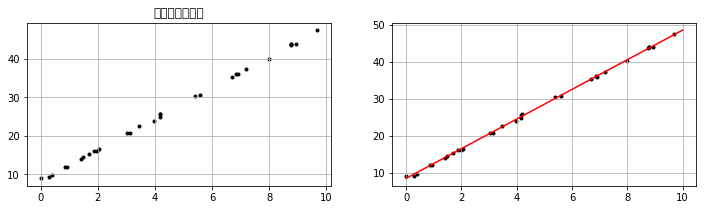

In [5]:
rng = np.random.RandomState(1)
xtrain = 10 * rng.rand(30)
ytrain = 8 + 4 * xtrain + rng.rand(30)
# np.random.RandomState : 随机数种子，只要该种子相同(seed)相同，产生的随机数序列就是相同的。
# 样本关系 y = 8+4x
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(1,2,1)
plt.scatter(xtrain,ytrain,marker='.',color='k')
plt.grid()
plt.title('样本数据散点图')       #生成散点图

# 实例化 LinearRegression() 方法 
# 并按照xtrain 和 ytrain 画出 线性图
# xtrain[:,np.newaxis] ： 将xtrain由行数据 转为 列数据
# .coef_ : 查看直线的斜率
# .intercept_: 查看 截距
model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)
print(model.coef_)
print(model.intercept_)

# 现在随机给定一些x值 根据已经建好的模型计算出 y值
xtest = np.linspace(0,10,1000)
ytest = model.predict(xtest[:,np.newaxis])

ax2 = fig.add_subplot(1,2,2)
plt.scatter(xtrain,ytrain,marker='.',color='k')
plt.plot(xtest,ytest,color='r')
plt.grid()

Text(0.5,1,'误差')

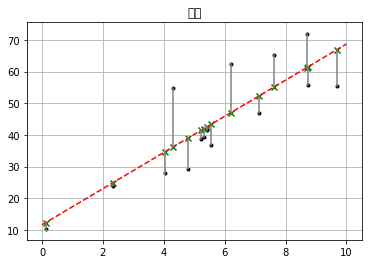

In [8]:
# 为了演示出误差值，这里选用8号种子
# 创建样本数据并进行拟合
rng = np.random.RandomState(8)
xtrain = 10 * rng.rand(15)
ytrain = 8 + 4 * xtrain + rng.rand(15) *30
model.fit(xtrain[:,np.newaxis],ytrain)
xtest = np.linspace(0,10,1000)
ytest = model.predict(xtest[:,np.newaxis])

plt.plot(xtest,ytest,color='r',linestyle='--')# 拟合直线
plt.scatter(xtrain,ytrain,marker='.',color='k') # 样本数据散点图
ytest2 = model.predict(xtrain[:,np.newaxis])# 计算出样本数据x 在拟合直线上的y值
plt.scatter(xtrain,ytest2,marker='x',color='g')#ytest2的散点图
plt.plot([xtrain,xtrain],[ytrain,ytest2],color='gray') # 绘制误差线
plt.grid()
plt.title('误差')

In [13]:
# 多元线性回归
rng = np.random.RandomState(5)
xtrain = 10 * rng.rand(150,4)
ytrain = 20 + np.dot(xtrain,[1.5,2,-4,3]) + rng.rand(150)
df = pd.DataFrame(xtrain,columns=['b1','b2','b3','b4'])
df['y'] = ytrain

model = LinearRegression()
model.fit(df[['b1','b2','b3','b4']],df['y'])
print('该直线的斜率为:',model.coef_)
print('该直线的截距为:%.2f' % model.intercept_)
print('该直线的方程表达为: \n y = %.1fx1 + %.1fx2 + %.1fx3 +%.1fx4 + %.1f'
      % (model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.intercept_))

该直线的斜率为: [ 1.501989    1.99186894 -4.00453124  3.00278851]
该直线的截距为:20.53
该直线的方程表达为: 
 y = 1.5x1 + 2.0x2 + -4.0x3 +3.0x4 + 20.5
